In [44]:
from visualization_tools import *
import pandas as pd
import json

In [45]:
try:
   df.head()
except:
    print("df not loaded, loading now")
    run_number = range(1, 33)
    #task = "tensorflow"
    folder = "C:\\Users\\lamec\\WORK\\evolutionary_optimization_dumps\\dumps"
    #folder = "C:\\Users\\lamec\\WORK\\evolutionary_optimization"
    #folder = "/Users/soren/Work/evolutionary_optimization"
    # Create the DataFrame with ified columns and data types
    df = pd.DataFrame({
        'Experiment name': pd.Series(dtype='string'),
        'Run number': pd.Series(dtype='string'),
        'Individual number': pd.Series(dtype='int64'),
        'Phenotype': pd.Series(dtype='string'),
        'Smart Phenotype': pd.Series(dtype='string'),
        'Fitness': pd.Series(dtype='float64'),
        'Duration': pd.Series(dtype='float64'),
        'Source': pd.Series(dtype='string')
    })


    df_full_eval = load_results(folder)
    df = df_full_eval


In [46]:
 # Assuming you already have the DataFrame, let's call it 'df'

# Group by 'Experiment name' and 'Run number', then count the entries in each group
individual_counts = df.groupby(['Experiment name', 'Run number'])['Individual number'].nunique().reset_index(name='Unique Individual Count')
df['Fitness'] = df['Fitness'] * -1

<Figure size 720x432 with 0 Axes>

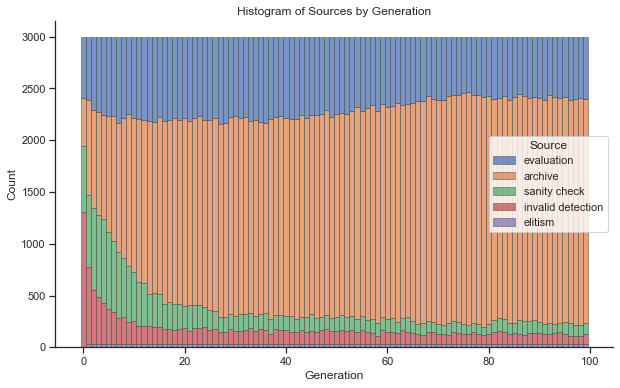

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="ticks")
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed

# Ensure 'Generation' is categorical for proper ordering on x-axis
df['Generation'] = df['Generation'].astype('category')

f, ax = plt.subplots(figsize=(10, 6))
sns.despine(f)

# Plot histogram with stacked bars
sns.histplot(
    data=df,
    #data=df[df['Source'] == 'elitism'],
    x="Generation",
    hue='Source',
    multiple="stack",
    edgecolor=".3",
    linewidth=.5,
)

# Add labels and title
plt.xlabel('Generation')
plt.ylabel('Count')
plt.title('Histogram of Sources by Generation')

# Show the plot
plt.show()


In [48]:
df_full_eval = pd.read_csv('C:\\Users\\lamec\\WORK\\evolutionary_optimization_dumps\\dumps\\dataframe3.csv')
df_full_eval = df_full_eval[df_full_eval['Full Duration'] != 0.0]




In [49]:
# Create new columns for analysis
df_full_eval['Duration Difference'] = df_full_eval['Full Duration'] - df_full_eval['duration']
df_full_eval['Fitness Difference'] = abs(df_full_eval['Full Fitness'] - df_full_eval['Fitness'])
df_full_eval['Optimizer Class'] = df_full_eval['Full Duration']
df_full_eval['Predicted Optimizer Class'] = df_full_eval['Full Duration']

def f(row):
    #print("########################################################################################################################################################################################")
    #print(f"{row.name}, {row}")
    opt_class = ''
    if row['Full Fitness'] <= 0.15:
        opt_class = 'invalid optimizer'
    else:
        opt_class = 'strong optimizer'
    row['Optimizer Class'] = opt_class
    return row

def f2(row):
    #print("########################################################################################################################################################################################")
    #print(f"{row.name}, {row}")
    opt_class = ''
    if row['Fitness'] <= 0.15:
        opt_class = 'invalid optimizer'
    else:
        opt_class = 'strong optimizer'
    row['Predicted Optimizer Class'] = opt_class
    return row

def f3(row):
    corrected_fitness = row['Fitness']
    if row['source'] == "invalid detection":
        corrected_fitness = 0.1
    row['Fitness'] = corrected_fitness
    return row
df_full_eval = df_full_eval.apply(f, axis=1)
df_full_eval = df_full_eval.apply(f2, axis=1)
df_full_eval = df_full_eval.apply(f3, axis=1)

In [50]:
def get_outliers(df_full_eval):
    outliers = []
    # Some strong optimizers are getting detected as invalid
    foo = [x for x in df_full_eval.loc[(df_full_eval['Optimizer Class'] == 'strong optimizer') & (df_full_eval['source'] == 'invalid detection'), ['Fitness', 'Full Fitness', 'Smart Phenotype']].index] 
    outliers.extend(foo)
    print(f"Dropping {len(foo)} outliers")

    # Some strong optimizers are getting detected as degenerate
    foo = [x for x in df_full_eval[(df_full_eval['source'] == 'sanity check') & (df_full_eval['Optimizer Class'] == 'strong optimizer')].index]
    outliers.extend(foo)

    return outliers

#df_full_eval = df_full_eval.drop(get_outliers(df_full_eval))

<Figure size 720x432 with 0 Axes>

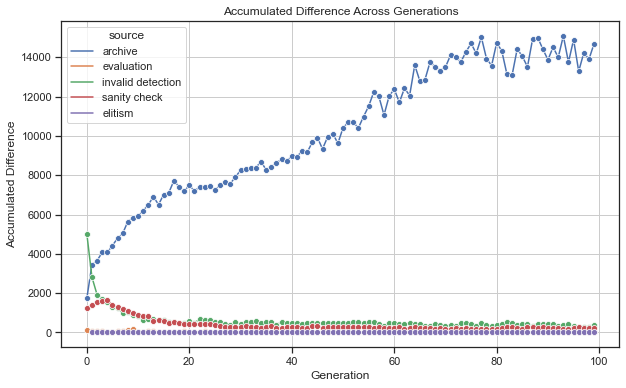

203846

In [51]:
sns.set_theme(style="ticks")
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed

grouped_df = df_full_eval.groupby(['Generation', 'source']).sum()

# Step 3: Plot using Seaborn
plt.figure(figsize=(10, 6))
sns.lineplot(data=grouped_df, x='Generation', y='Duration Difference', hue='source', marker='o')
plt.title('Accumulated Difference Across Generations')
plt.xlabel('Generation')
plt.ylabel('Accumulated Difference')
plt.grid(True)
plt.show()
df_full_eval.describe()
#grouped_df.loc[(61, 'archive')]
df_full_eval['Duration Difference'].idxmax()


In [52]:
df_full_eval["Fitness Difference"] = abs(df_full_eval['Full Fitness'] - df_full_eval['Fitness'])
df_full_eval.groupby(['Generation']).sum()
fitness_difference_cumsum = df_full_eval.groupby(['Generation']).sum()

def cumsum(fitness_difference_cumsum):
    x = df_full_eval.groupby(['Generation', 'source']).sum()
    def cumsum_instance(row):
        #print("########################################################################################################################################################################################")
        #print(f"{row.name}, {row}")
        row['Fitness Difference'] = np.mean(abs(x.iloc[np.arange(0,row.name + 1)]['Fitness Difference']))
        return row
    return cumsum_instance
f = cumsum(fitness_difference_cumsum)
#print(fitness_difference_cumsum['Fitness Difference'])
fitness_difference_cumsum = fitness_difference_cumsum.apply(f, axis=1)
df_full_eval.groupby(['Generation', 'source']).sum()

Unnamed: 0  Unnamed: 0.1  Unnamed: 0.1.1  \
Generation source                                                        
0          archive              41966558      41966558        41966558   
           evaluation           89223024      89223024        92733488   
           invalid detection   115423093     115423093       115423093   
           sanity check         57733073      57733073        57733073   
1          archive              80749275      80749275        80749275   
...                                  ...           ...             ...   
99         archive             199435188     199435188       199435188   
           elitism               2772001       2772001         2772001   
           evaluation           98494919      98494919       104222455   
           invalid detection    10248254      10248254        10248254   
           sanity check         10279159      10279159        10279159   

                              Unnamed: 0.1.1.1  Individual number     Fitness  \
Generation source                                                               
0          archive                    41966558              21243   22.700000   
           evaluation                 92733488              27748   60.455892   
           invalid detection         115423093              48043  100.300000   
           sanity check               57733073              24142   49.600000   
1          archive                    80749275              26337   41.443419   
...                                        ...                ...         ...   
99         archive                   199435188            3111521  613.420907   
           elitism                     2772001              63440   19.210909   
           evaluation                104222455            3229999  162.099819   
           invalid detection          10248254             337663    8.100000   
           sanity check               10279159             337111    8.400000   

                                 duration  Full Duration  Full Fitness  \
Generation source                                                        
0          archive               0.000026    1736.592837     35.158728   
           evaluation         4292.677593    4405.253213     60.455892   
           invalid detection     0.021063    5026.668818     99.980110   
           sanity check       1281.697105    2545.088278     49.682219   
1          archive              35.958509    3478.781078     70.759565   
...                                   ...            ...           ...   
99         archive             873.564690   15570.620513    575.582110   
           elitism             463.238531     463.238531     19.210909   
           evaluation         5947.539206    5947.539206    162.099819   
           invalid detection     0.001898     394.591125      8.191055   
           sanity check        214.210390     423.484008      8.400000   

                                Difference  Accumulated Difference  \
Generation source                                                    
0          archive            1.245873e+01            19904.870836   
           evaluation         0.000000e+00            41350.474694   
           invalid detection  9.998011e+01            55833.292630   
           sanity check       1.688007e-01            26789.381931   
1          archive            2.967000e+01            28844.606915   
...                                    ...                     ...   
99         archive            7.323174e+01            70318.319136   
           elitism            0.000000e+00              939.594651   
           evaluation         0.000000e+00            33996.252085   
           invalid detection  8.191055e+00             3711.910266   
           sanity check       1.251698e-07             3690.777661   

                              Duration Difference  Fitness Difference  
Generation source                                                  

<Figure size 720x432 with 0 Axes>

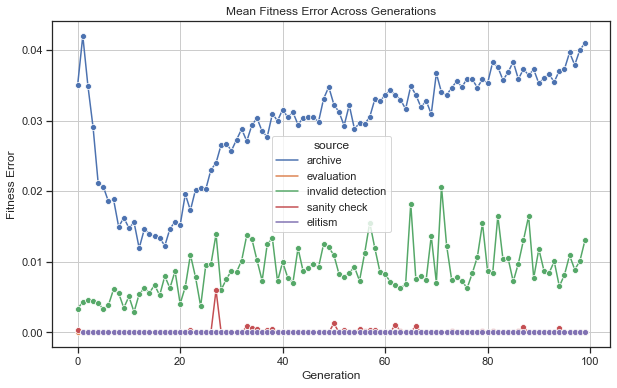

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,Unnamed: 0.1.1.1,Individual number,Generation,Fitness,duration,Full Duration,Full Fitness,Difference,Accumulated Difference,Duration Difference,Fitness Difference
count,255156.00000,255156.00000,255156.000000,255156.000000,255156.000000,255156.000000,255156.000000,255156.000000,255156.000000,255156.000000,255156.000000,255156.000000,255156.000000,255156.000000
mean,127577.50000,127577.50000,129804.670394,129804.670394,1457.285433,49.331009,0.202849,2.819880,7.264948,0.197950,0.022981,31.045093,4.445068,0.018563
std,73657.33698,73657.33698,77652.871716,77652.871716,1435.935922,28.751190,0.239194,5.406384,6.336555,0.237485,0.045696,20.556201,5.931736,0.042290
min,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,4.241654,0.003836,0.000000,0.000000,-4.085634,0.000000
25%,63788.75000,63788.75000,63788.750000,63788.750000,238.000000,24.000000,0.100000,0.000000,4.698610,0.100000,0.000000,14.247199,0.000000,0.000000
50%,127577.50000,127577.50000,127577.500000,127577.500000,1145.000000,49.000000,0.100000,0.000000,5.212921,0.100000,0.000000,26.873146,4.624486,0.000000
75%,191366.25000,191366.25000,191366.250000,191366.250000,2084.000000,74.000000,0.129109,6.894738,7.216742,0.113255,0.026109,48.745580,4.902993,0.015782
max,255155.00000,255155.00000,299994.000000,299994.000000,8085.000000,99.000000,0.845400,204.725095,953.249386,0.850491,0.828400,112.607638,953.249386,0.735836


In [53]:
sns.set_theme(style="ticks")
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
grouped_df = df_full_eval.groupby(['Generation', 'source']).mean()
# Step 3: Plot using Seaborn
plt.figure(figsize=(10, 6))
sns.lineplot(data=grouped_df, x='Generation', y='Fitness Difference', hue='source', marker='o')
plt.title('Mean Fitness Error Across Generations')
plt.xlabel('Generation')
plt.ylabel('Fitness Error')
plt.grid(True)
plt.show()
df_full_eval.describe()

<Figure size 720x432 with 0 Axes>

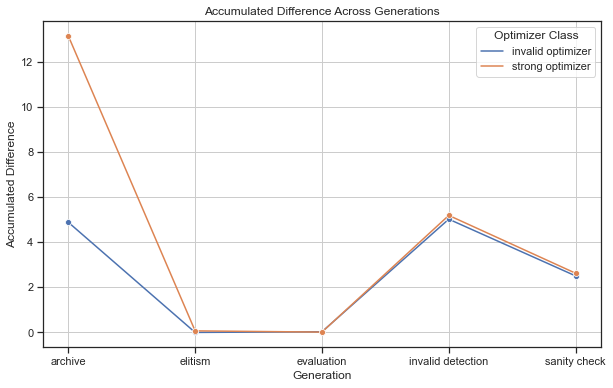

203846

In [54]:
sns.set_theme(style="ticks")
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed

grouped_df = df_full_eval.groupby(['source', 'Optimizer Class']).mean()

# Step 3: Plot using Seaborn
plt.figure(figsize=(10, 6))
sns.lineplot(data=grouped_df, x='source', y='Duration Difference', hue='Optimizer Class', marker='o')
plt.title('Accumulated Difference Across Generations')
plt.xlabel('Generation')
plt.ylabel('Accumulated Difference')
plt.grid(True)
plt.show()
df_full_eval.describe()
#grouped_df.loc[(61, 'archive')]
df_full_eval['Duration Difference'].idxmax()


<Figure size 1440x432 with 0 Axes>

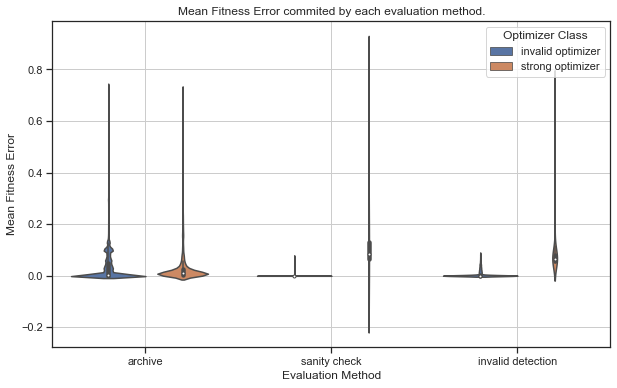

,Optimizer Class,Predicted Optimizer Class
0,strong optimizer,strong optimizer
1,invalid optimizer,invalid optimizer
2,invalid optimizer,invalid optimizer
3,invalid optimizer,invalid optimizer
4,invalid optimizer,invalid optimizer
...,...,...
255151,invalid optimizer,invalid optimizer
255152,invalid optimizer,invalid optimizer
255153,invalid optimizer,invalid optimizer
255154,invalid optimizer,invalid optimizer


In [55]:
sns.set_theme(style="ticks")
plt.figure(figsize=(20, 6))  # Adjust the figure size as needed


df_full_eval[~((df_full_eval['source'] == 'elitism') & (df_full_eval['source'] == 'evaluation'))]
foo_df = df_full_eval[~((df_full_eval['source'] == 'elitism') | (df_full_eval['source'] == 'evaluation'))]
grouped_df = foo_df.groupby(['source', 'Optimizer Class']).mean()

# Step 3: Plot using Seaborn
plt.figure(figsize=(10, 6))
sns.violinplot(data=foo_df, x='source', y='Fitness Difference', hue='Optimizer Class')
plt.title('Mean Fitness Error commited by each evaluation method.')
plt.xlabel('Evaluation Method')
plt.ylabel('Mean Fitness Error')
plt.grid(True)
plt.show()
df_full_eval.loc[:,['Optimizer Class', 'Predicted Optimizer Class']]

In [56]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
labels = df_full_eval['Optimizer Class'].unique()

def print_mechanism_stats(df_full_eval, mechanism = None, labels = None):
    if mechanism != None:
        working_df = df_full_eval[df_full_eval['source'] == mechanism]
    else:
        working_df = df_full_eval
    print(f"Classification report for {mechanism}")    
    print(f"Total time saved by {mechanism}: {df_full_eval.loc[df_full_eval['source'] == mechanism, 'Duration Difference'].sum() / 60 / 60} in hours")
    print(classification_report(working_df['Optimizer Class'], working_df['Predicted Optimizer Class']))
   
def make_confusion_matrix(df_full_eval, mechanism = None, labels = None):
    if mechanism != None:
        working_df = df_full_eval[df_full_eval['source'] == mechanism]
    else:
        working_df = df_full_eval
    plt.figure(figsize=(8,6), dpi=100)
    print(f"Classification report for {mechanism}")    
    print(f"Total time saved by {mechanism}: {df_full_eval.loc[df_full_eval['source'] == mechanism, 'Duration Difference'].sum() / 60 / 60} in hours")
    print(classification_report(working_df['Optimizer Class'], working_df['Predicted Optimizer Class']))
    cm = confusion_matrix(working_df['Optimizer Class'], working_df['Predicted Optimizer Class'], labels=labels)
    ax = sns.heatmap(cm, annot=True, fmt='d', )

    ax.set_xlabel("Predicted Optimizer Class", fontsize=14, labelpad=20)
    ax.xaxis.set_ticklabels(labels)
    
    # set y-axis label and ticks
    ax.set_ylabel("Actual Optimizer Class", fontsize=14, labelpad=20)
    ax.yaxis.set_ticklabels(labels)
    
    if mechanism == None:
        # set plot title
        ax.set_title("Confusion Matrix for the Optimizer Class Prediction", fontsize=14, pad=20)
    else:
        ax.set_title(f"Confusion Matrix for {mechanism} Optimizer Class Prediction", fontsize=14, pad=20)

    
    plt.show()


In [57]:
for mechanism in df_full_eval['source'].unique():
    print_mechanism_stats(df_full_eval=df_full_eval, mechanism=mechanism, labels=labels)

Classification report for elitism
Total time saved by elitism: 0.043858002026875946 in hours
                   precision    recall  f1-score   support

invalid optimizer       1.00      1.00      1.00        42
 strong optimizer       1.00      1.00      1.00      2286

         accuracy                           1.00      2328
        macro avg       1.00      1.00      1.00      2328
     weighted avg       1.00      1.00      1.00      2328

Classification report for archive
Total time saved by archive: 286.4620617744969 in hours
                   precision    recall  f1-score   support

invalid optimizer       0.97      0.89      0.93    121688
 strong optimizer       0.69      0.89      0.77     33226

         accuracy                           0.89    154914
        macro avg       0.83      0.89      0.85    154914
     weighted avg       0.91      0.89      0.89    154914

Classification report for evaluation
Total time saved by evaluation: 0.5379046367936664 in hours
      

c:\Users\lamec\anaconda3\envs\sge\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\lamec\anaconda3\envs\sge\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\lamec\anaconda3\envs\sge\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\lamec\anaconda3\env

Classification report for invalid detection
Total time saved by invalid detection: 16.82135991891225 in hours
                   precision    recall  f1-score   support

invalid optimizer       0.98      1.00      0.99     11772
 strong optimizer       0.00      0.00      0.00       277

         accuracy                           0.98     12049
        macro avg       0.49      0.50      0.49     12049
     weighted avg       0.95      0.98      0.97     12049



c:\Users\lamec\anaconda3\envs\sge\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\lamec\anaconda3\envs\sge\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Classification report for None
Total time saved by None: 0.0 in hours
                   precision    recall  f1-score   support

invalid optimizer       0.98      0.94      0.96    209804
 strong optimizer       0.75      0.91      0.83     45352

         accuracy                           0.93    255156
        macro avg       0.87      0.92      0.89    255156
     weighted avg       0.94      0.93      0.93    255156



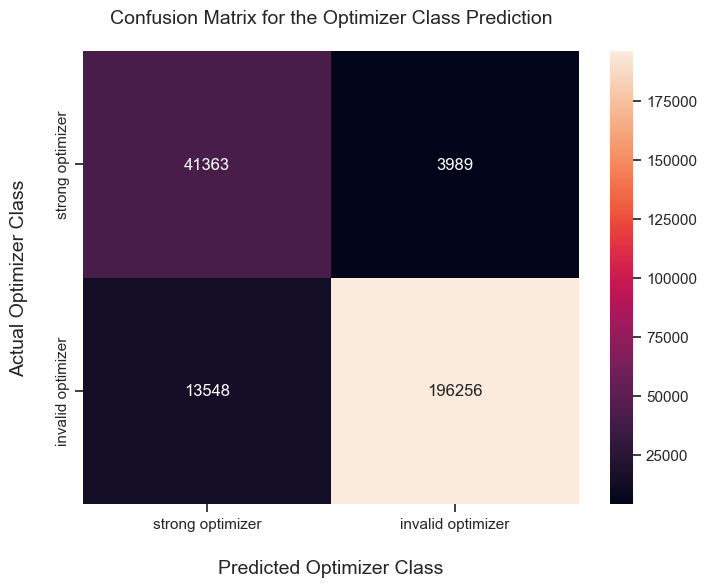

Classification report for elitism
Total time saved by elitism: 0.043858002026875946 in hours
                   precision    recall  f1-score   support

invalid optimizer       1.00      1.00      1.00        42
 strong optimizer       1.00      1.00      1.00      2286

         accuracy                           1.00      2328
        macro avg       1.00      1.00      1.00      2328
     weighted avg       1.00      1.00      1.00      2328



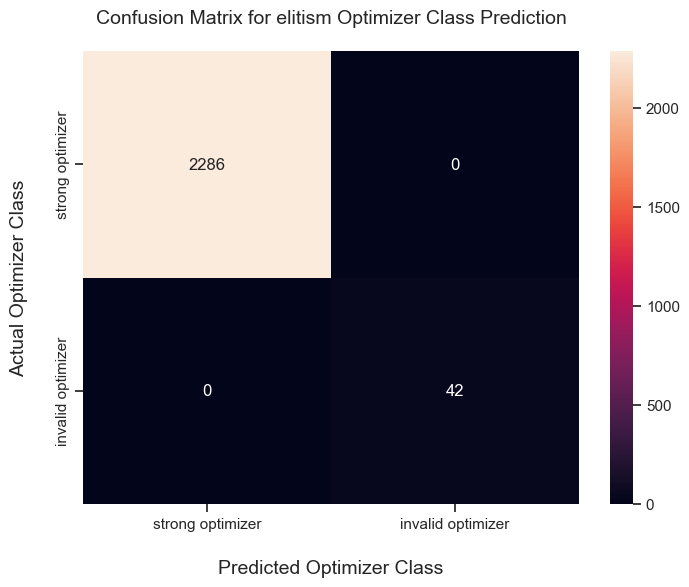

Classification report for archive
Total time saved by archive: 286.4620617744969 in hours
                   precision    recall  f1-score   support

invalid optimizer       0.97      0.89      0.93    121688
 strong optimizer       0.69      0.89      0.77     33226

         accuracy                           0.89    154914
        macro avg       0.83      0.89      0.85    154914
     weighted avg       0.91      0.89      0.89    154914



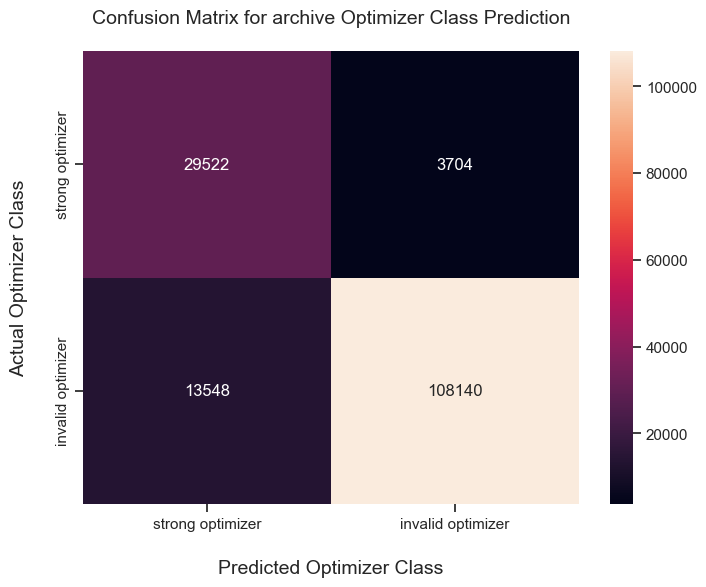

Classification report for evaluation
Total time saved by evaluation: 0.5379046367936664 in hours
                   precision    recall  f1-score   support

invalid optimizer       1.00      1.00      1.00     60244
 strong optimizer       1.00      1.00      1.00      9555

         accuracy                           1.00     69799
        macro avg       1.00      1.00      1.00     69799
     weighted avg       1.00      1.00      1.00     69799



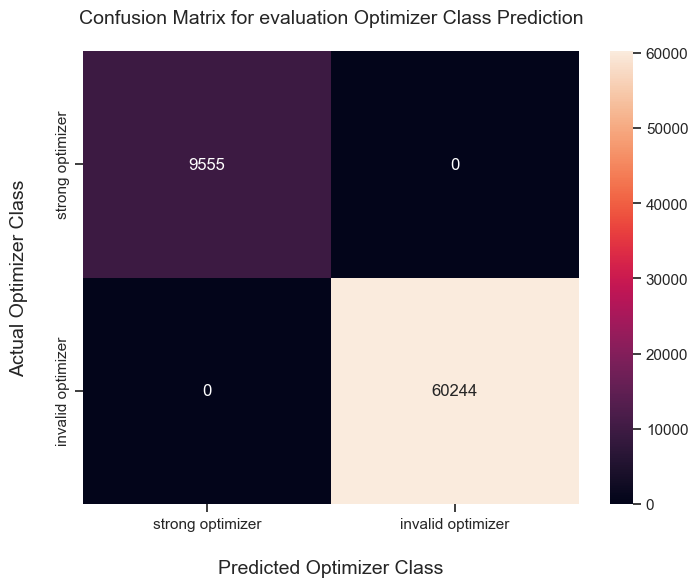

Classification report for sanity check
Total time saved by sanity check: 11.186412857903374 in hours
                   precision    recall  f1-score   support

invalid optimizer       1.00      1.00      1.00     16058
 strong optimizer       0.00      0.00      0.00         8

         accuracy                           1.00     16066
        macro avg       0.50      0.50      0.50     16066
     weighted avg       1.00      1.00      1.00     16066



c:\Users\lamec\anaconda3\envs\sge\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\lamec\anaconda3\envs\sge\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\lamec\anaconda3\envs\sge\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


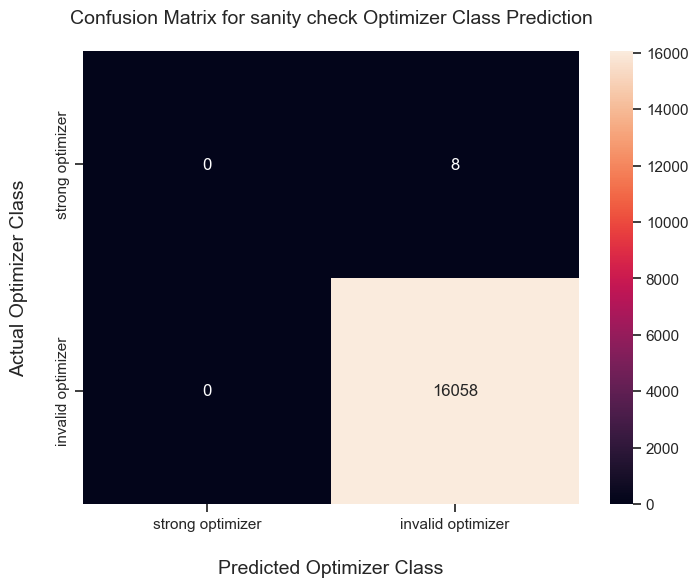

Classification report for invalid detection
Total time saved by invalid detection: 16.82135991891225 in hours
                   precision    recall  f1-score   support

invalid optimizer       0.98      1.00      0.99     11772
 strong optimizer       0.00      0.00      0.00       277

         accuracy                           0.98     12049
        macro avg       0.49      0.50      0.49     12049
     weighted avg       0.95      0.98      0.97     12049



c:\Users\lamec\anaconda3\envs\sge\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\lamec\anaconda3\envs\sge\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\lamec\anaconda3\envs\sge\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


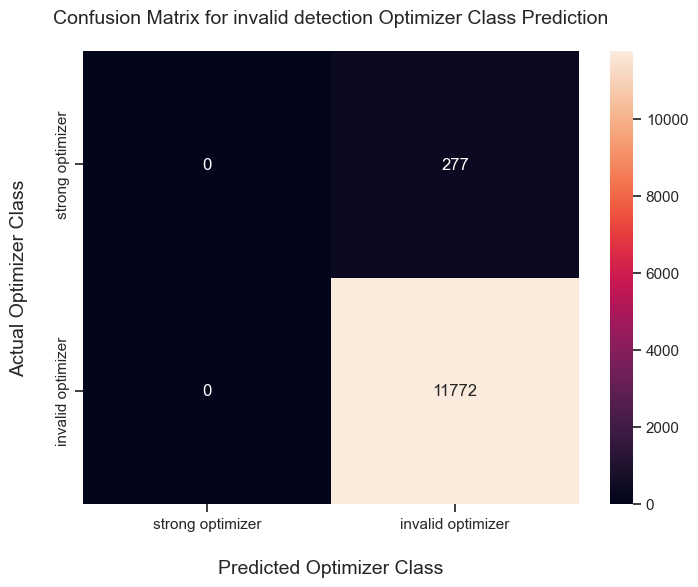

In [58]:
make_confusion_matrix(df_full_eval=df_full_eval, labels=labels)
for mechanism in df_full_eval['source'].unique():
    make_confusion_matrix(df_full_eval=df_full_eval, mechanism=mechanism, labels=labels)

In [59]:
len(df_full_eval[df_full_eval['Optimizer Class'] != df_full_eval['Predicted Optimizer Class']])
df_full_eval[df_full_eval['Optimizer Class'] != df_full_eval['Predicted Optimizer Class']].loc[:, ["Experiment name", "Run number", "Individual number", "Generation", "Phenotype", ]]

,Experiment name,Run number,Individual number,Generation,Phenotype
22,evolutionary_optimization,run_6,189,52,"alpha_func, beta_func, sigma_func, grad_func =..."
27,evolutionary_optimization,run_6,189,52,"alpha_func, beta_func, sigma_func, grad_func =..."
30,evolutionary_optimization,run_6,189,52,"alpha_func, beta_func, sigma_func, grad_func =..."
32,evolutionary_optimization,run_6,189,52,"alpha_func, beta_func, sigma_func, grad_func =..."
59,evolutionary_optimization,run_6,189,52,"alpha_func, beta_func, sigma_func, grad_func =..."
...,...,...,...,...,...
234493,evolutionary_optimization,run_15,449,47,"alpha_func, beta_func, sigma_func, grad_func =..."
234759,evolutionary_optimization,run_15,3277,72,"alpha_func, beta_func, sigma_func, grad_func =..."
234808,evolutionary_optimization,run_15,2043,50,"alpha_func, beta_func, sigma_func, grad_func =..."
234909,evolutionary_optimization,run_15,190,31,"alpha_func, beta_func, sigma_func, grad_func =..."


In [60]:
df_full_eval[df_full_eval['source'] == "invalid detection"]['Full Fitness']

99        0.100000
195       0.100000
299       0.085345
392       0.092382
398       0.153636
            ...   
234894    0.077509
234896    0.098618
234996    0.100000
234998    0.100000
234999    0.100000
Name: Full Fitness, Length: 12049, dtype: float64

In [61]:
for mechanism in df_full_eval['source'].unique():
    print(f"Total time saved by {mechanism}: {df_full_eval.loc[df_full_eval['source'] == mechanism, 'Duration Difference'].sum() / 60 / 60} in hours")


Total time saved by elitism: 0.043858002026875946 in hours
Total time saved by archive: 286.4620617744969 in hours
Total time saved by evaluation: 0.5379046367936664 in hours
Total time saved by sanity check: 11.186412857903374 in hours
Total time saved by invalid detection: 16.82135991891225 in hours
